## Data pre-processing

In [73]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [74]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [75]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [76]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [77]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [78]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [79]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [80]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [81]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [82]:
df = pd.DataFrame([
    ['green', 'М', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,М,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [83]:
size_mapping = {'XL': 3,
                'L': 2,
                'М': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [84]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     М
1     L
2    XL
Name: size, dtype: object

In [85]:
class_mapping = {label: idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [86]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [87]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [88]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [89]:
# Wrong way
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [90]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [91]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot ', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [92]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [93]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [94]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot ', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [95]:
df = pd.DataFrame([['green', 'М', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,М,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [96]:
df['x > М'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > М,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [97]:
# df_wine = pd.read_csv(r'C:\Users\maxim.korolev\PycharmProjects\pml\datapreprocessing\wine.data')
df_wine = pd.read_csv('/home/user/Документы/Projects/Python/pml/datapreprocessing/wine.data')
df_wine.columns = ['Метка класса', 'Алкоголь',
                   # 'Class label', 'Alcohol'
                   'Яблочная кислота', 'Зола',
                   # 'Malic acid ', 'Ash'
                   'Щелочность золы', 'Магний',
                   # 'Alcalinityofash', 'Magnesium'
                   'Всего фенолов', 'Флавоноиды',
                   # 'Total phenols ', 'Flavanoids'
                   'Нефлавоноидные фенолы',
                   # 'Nonflavanoid phenols'
                   'Проантоцианидины',
                   # 'Proanthocyanins'
                   'Интенсивность цвета', 'Оттенок',
                   # 'Color intensity', 'Ние'
                   '00280/00315 разбавленных вин',
                   # 'OD280/0D315 of diluted wines'
                   'Пролин']
# 'Proline'
df_wine.head()

,Метка класса,Алкоголь,Яблочная кислота,Зола,Щелочность золы,Магний,Всего фенолов,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,00280/00315 разбавленных вин,Пролин
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [98]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

In [99]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm

array([[0.51461988, 0.87944664, 0.40522876, ..., 0.12765957, 0.08677686,
        0.31883024],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.71487603,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.59504132,
        0.71825963],
       ...,
       [0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.32231405,
        0.19400856],
       [0.23684211, 0.10869565, 0.15686275, ..., 0.40425532, 0.7231405 ,
        0.02425107],
       [0.47953216, 1.        , 0.28104575, ..., 0.26595745, 0.75619835,
        0.07275321]])

In [100]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('стандартизированные значения:', (ex - ex.mean()) / ex.std())

стандартизированные значения: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [101]:
print('нормализованные значения: ', (ex - ex.min()) / (ex.max() - ex.min()))

нормализованные значения:  [0.  0.2 0.4 0.6 0.8 1. ]


In [102]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std

array([[ 0.1937094 ,  2.37977151, -0.20420766, ..., -1.5782345 ,
        -1.64200771, -0.08460637],
       [ 0.92207682, -0.70975882,  1.25077192, ...,  1.40544599,
         0.55879351,  1.47960155],
       [ 0.88504119, -0.73508284,  1.25077192, ...,  1.13002933,
         0.1389038 ,  1.63295526],
       ...,
       [ 0.74924387,  2.17717936, -0.08934085, ..., -0.15524842,
        -0.81670726, -0.62134438],
       [-0.97908559, -0.91235098, -1.65918724, ..., -0.3847623 ,
         0.58775142, -1.35130807],
       [ 0.04556687,  2.89469324, -0.93169745, ..., -0.9814984 ,
         0.70358306, -1.14274701]])

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.6, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Правильность при обучении:', lr.score(X_train_std, y_train))
print('Правильность при испытании:', lr.score(X_test_std, y_test))

Правильность при обучении: 1.0
Правильность при испытании: 1.0


In [104]:
lr.intercept_

array([-1.49639751, -1.84272954, -2.66521329])

In [105]:
lr.coef_

array([[ 1.2564357 ,  0.50364458,  0.30518596, -0.90191349,  0.        ,
         0.        ,  1.31453889,  0.        ,  0.        ,  0.        ,
         0.        ,  0.91300289,  3.48954421],
       [-1.18925572, -0.72885047, -0.63177303,  0.23060963, -0.11813065,
         0.12569963,  0.76464168,  0.19119574,  0.16108131, -2.62519984,
         1.04886168,  0.        , -3.55853258],
       [ 0.42333584,  0.05494491,  0.54487208,  0.        ,  0.        ,
         0.        , -2.94881824, -0.02682156,  0.        ,  1.71203786,
        -1.14393802, -0.49435894,  0.        ]])

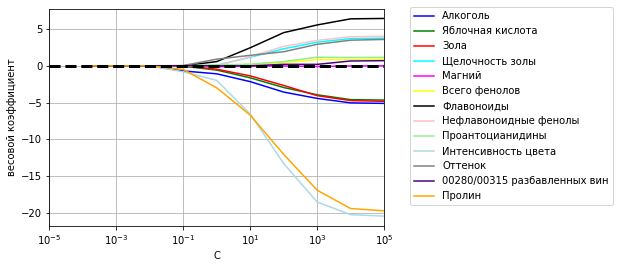

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
ax.grid(True)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10. ** c,
                            solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10 ** (-5), 10 ** 5])
plt.ylabel('вecoвoй коэффициент')
plt.xlabel('С')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

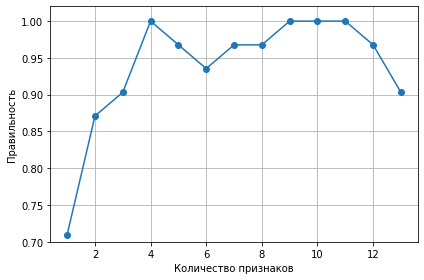

In [129]:
from sbs import SBS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Правильность')
plt.xlabel('Количество признаков')
plt.grid()
plt.tight_layout()
plt.show()

In [120]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])
knn.fit(X_train_std, y_train)
print('Правильность при обучении:',
knn.score(X_train_std, y_train))
print ('Правильность при испытании:',
knn.score(X_test_std, y_test))

Index(['Проантоцианидины', 'Оттенок', 'Пролин'], dtype='object')
Правильность при обучении: 0.967479674796748
Правильность при испытании: 0.9629629629629629
